# Heart Disease Classification with Logistic Regression 

Dataset: Heart Disease | [download](https://www.kaggle.com/ronitf/heart-disease-uci)

In [0]:
import io
import pandas as pd
from google.colab import files
import numpy as np

In [0]:
# To upload file and open it using pandas 
playStoreFile = files.upload()

Saving heart.csv to heart (1).csv


In [0]:
# Reading the heart dataset
heartDTlab2 = pd.read_csv(io.StringIO(playStoreFile['heart.csv'].decode('utf-8')))

In [0]:
# showcasing the first two data
heartDTlab2.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [0]:
# Split the features and the target
x_heartDTlab2 = heartDTlab2[heartDTlab2.columns[:13]]
y_heartDTlab2 = heartDTlab2.target

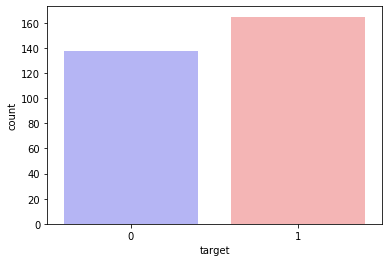

In [0]:
import seaborn as snsLab2
import matplotlib.pyplot as pltLab2

# illustrate the values of the target feature
snsLab2.countplot(x = y_heartDTlab2, data=heartDTlab2, palette="bwr")
pltLab2.show()

In [0]:
from sklearn.model_selection import train_test_split
# Divding the data to two parts; one is for traning, and the other one is for the testing
x_trainLab2, x_testLab2, y_trainLab2, y_testLab2 = train_test_split(x_heartDTlab2, y_heartDTlab2, test_size = 0.2, random_state=0)

In [0]:
x_trainLab2.shape

(242, 13)

### Normalizing the data

In [0]:
from sklearn.preprocessing import StandardScaler
# implementation of normalization the data
scLab2 = StandardScaler()
x_trainLab2 = scLab2.fit_transform(x_trainLab2)
x_testLab2 = scLab2.transform(x_testLab2)

In [0]:
from keras.models import Sequential,load_model
import keras
from keras.layers import Dense, Dropout, Flatten
#Creating the model
HeartLab2Model = Sequential()

HeartLab2Model.add(Dense(30, input_dim=13, activation='relu')) # hidden layer
HeartLab2Model.add(Dense(15, activation='relu')) # hidden layer
HeartLab2Model.add(Dense(1,activation= 'sigmoid'))
HeartLab2Model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow import keras
TensorBoardLab2 = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
HeartLab2 = HeartLab2Model.fit(x_trainLab2, y_trainLab2, epochs=50, verbose=1, callbacks=[TensorBoardLab2],
          validation_data=(x_testLab2, y_testLab2))

Train on 242 samples, validate on 61 samples
Epoch 1/50
242/242 [==============================] - 0s 2ms/step - loss: 0.7171 - acc: 0.4835 - val_loss: 0.7428 - val_acc: 0.4590
Epoch 2/50
242/242 [==============================] - 0s 76us/step - loss: 0.6774 - acc: 0.5661 - val_loss: 0.6986 - val_acc: 0.5574
Epoch 3/50
242/242 [==============================] - 0s 65us/step - loss: 0.6437 - acc: 0.6405 - val_loss: 0.6580 - val_acc: 0.6393
Epoch 4/50
242/242 [==============================] - 0s 68us/step - loss: 0.6151 - acc: 0.6901 - val_loss: 0.6249 - val_acc: 0.7049
Epoch 5/50
242/242 [==============================] - 0s 53us/step - loss: 0.5875 - acc: 0.7231 - val_loss: 0.5972 - val_acc: 0.7049
Epoch 6/50
242/242 [==============================] - 0s 61us/step - loss: 0.5631 - acc: 0.7727 - val_loss: 0.5726 - val_acc: 0.7541
Epoch 7/50
242/242 [==============================] - 0s 66us/step - loss: 0.5398 - acc: 0.7893 - val_loss: 0.5525 - val_acc: 0.7705
Epoch 8/50
242/242 [=====

In [0]:
# printing the summary and evaluation
print(HeartLab2Model.summary())
print(HeartLab2Model.evaluate(x_testLab2, y_testLab2))

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 30)                420       
_________________________________________________________________
dense_8 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 16        
Total params: 901
Trainable params: 901
Non-trainable params: 0
_________________________________________________________________
None
61/61 [==============================] - 0s 115us/step
[0.40087541644690466, 0.8196721350560423]


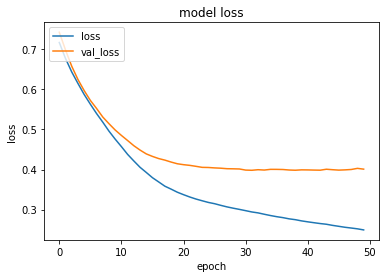

In [0]:
import matplotlib.pyplot as pltLab2
# plot the loss and val_loss
pltLab2.plot(HeartLab2.history['loss'])
pltLab2.plot(HeartLab2.history['val_loss'])
pltLab2.title('model loss')
pltLab2.ylabel('loss')
pltLab2.xlabel('epoch')
pltLab2.legend(['loss', 'val_loss'], loc='upper left')
pltLab2.show()


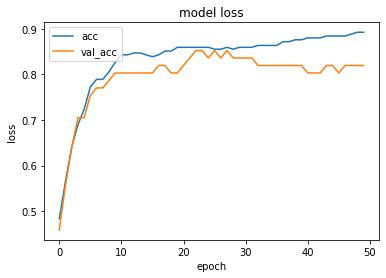

In [0]:
import matplotlib.pyplot as pltLab2
# plot the acc and val_acc
pltLab2.plot(HeartLab2.history['acc'])
pltLab2.plot(HeartLab2.history['val_acc'])
pltLab2.title('model loss')
pltLab2.ylabel('loss')
pltLab2.xlabel('epoch')
pltLab2.legend(['acc', 'val_acc'], loc='upper left')
pltLab2.show()


# Change three hyperparameter and report how the accuracy changes

In [0]:
from keras.models import Sequential,load_model
import keras
from keras.layers import Dense, Dropout, Flatten
#Creating the model
HeartLab2Model = Sequential()

HeartLab2Model.add(Dense(25, input_dim=13, activation='relu')) # hidden layer
HeartLab2Model.add(Dropout(rate=0.0005)) # hidden layer
HeartLab2Model.add(Dense(8, activation='relu')) # hidden layer
HeartLab2Model.add(Dense(1,activation= 'sigmoid'))
HeartLab2Model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.adam(lr = 0.0005), metrics=['accuracy'])

In [0]:
from tensorflow import keras
# TensorBoardLab2 = keras.callbacks.TensorBoard(log_dir='./Graph2', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
HeartLab2 = HeartLab2Model.fit(x_trainLab2, y_trainLab2, epochs=100, verbose=0,
          validation_data=(x_testLab2, y_testLab2))

In [0]:
print(HeartLab2Model.evaluate(x_testLab2, y_testLab2))

61/61 [==============================] - 0s 68us/step
[0.37226890687082637, 0.8360655669306145]


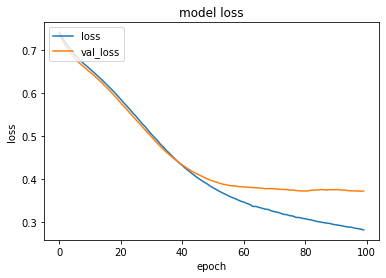

In [0]:
import matplotlib.pyplot as pltLab2
# plot the loss and val_loss
pltLab2.plot(HeartLab2.history['loss'])
pltLab2.plot(HeartLab2.history['val_loss'])
pltLab2.title('model loss')
pltLab2.ylabel('loss')
pltLab2.xlabel('epoch')
pltLab2.legend(['loss', 'val_loss'], loc='upper left')
pltLab2.show()


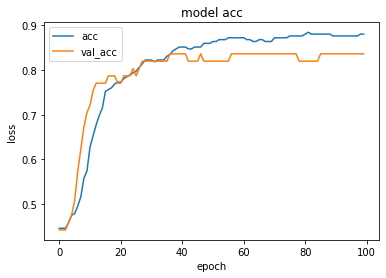

In [0]:
import matplotlib.pyplot as pltLab2
# plot the acc and val_acc
pltLab2.plot(HeartLab2.history['acc'])
pltLab2.plot(HeartLab2.history['val_acc'])
pltLab2.title('model acc')
pltLab2.ylabel('loss')
pltLab2.xlabel('epoch')
pltLab2.legend(['acc', 'val_acc'], loc='upper left')
pltLab2.show()
